In [1]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2024-05-07 11:22:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-05-07 11:22:48 (2.81 GB/s) - ‘drug200.csv’ saved [6027/6027]



Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data

In [4]:
data = pd.read_csv('drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [5]:
print(data.shape)

(200, 6)


In [6]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [10]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['BP'] = le.fit_transform(data['BP'])
data['Cholesterol'] = le.fit_transform(data['Cholesterol'])

In [14]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [15]:
data['Sex'].value_counts()

Sex
1    104
0     96
Name: count, dtype: int64

Training the data

In [16]:
X = data.drop(['Drug'],axis=1)
y = data['Drug']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [19]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
169,20,0,0,0,11.262
97,56,0,0,0,25.395
31,74,1,0,0,9.567
12,43,1,1,0,15.376
35,46,1,2,1,7.285
...,...,...,...,...,...
106,22,1,2,0,11.953
14,50,0,2,0,12.703
92,29,0,0,0,29.450
179,67,0,2,0,15.891


In [20]:
X_test

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,1,1,1,11.424
15,16,0,0,1,15.516
30,18,0,2,1,8.750
158,59,0,1,0,10.444
128,47,1,1,1,33.542
115,51,1,0,0,18.295
69,18,0,0,1,24.276
170,28,0,2,0,12.879
174,42,1,0,1,12.766
45,66,0,2,1,8.107


In [21]:
y_train

169    drugA
97     drugY
31     drugB
12     drugY
35     drugX
       ...  
106    drugX
14     drugX
92     drugY
179    drugY
102    drugC
Name: Drug, Length: 140, dtype: object

In [22]:
y_test

95     drugX
15     drugY
30     drugX
158    drugC
128    drugY
115    drugY
69     drugY
170    drugX
174    drugA
45     drugX
66     drugA
182    drugX
165    drugY
78     drugA
186    drugB
177    drugY
56     drugB
152    drugX
82     drugC
68     drugY
124    drugB
16     drugX
148    drugX
93     drugY
65     drugY
60     drugY
84     drugC
67     drugX
125    drugY
132    drugX
9      drugY
18     drugC
55     drugC
75     drugY
150    drugA
104    drugY
135    drugX
137    drugA
164    drugY
76     drugA
79     drugX
197    drugX
38     drugX
24     drugY
122    drugY
195    drugC
29     drugY
19     drugY
143    drugY
86     drugX
114    drugX
173    drugY
5      drugX
126    drugY
117    drugX
73     drugY
140    drugA
98     drugY
172    drugY
96     drugY
Name: Drug, dtype: object

In [23]:
from imblearn.over_sampling import SMOTE
X_train,y_train = SMOTE().fit_resample(X_train,y_train)

Standard scaler

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [27]:
y_pred

array(['drugX', 'drugA', 'drugX', 'drugC', 'drugY', 'drugB', 'drugY',
       'drugC', 'drugA', 'drugX', 'drugA', 'drugX', 'drugC', 'drugA',
       'drugB', 'drugC', 'drugB', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugB',
       'drugY', 'drugB', 'drugA', 'drugA', 'drugA', 'drugX', 'drugC',
       'drugX', 'drugY', 'drugY', 'drugC', 'drugC', 'drugY', 'drugB',
       'drugC', 'drugX', 'drugY', 'drugC', 'drugB', 'drugC', 'drugY',
       'drugA', 'drugY', 'drugX', 'drugY'], dtype=object)

In [28]:
y_pred_train

array(['drugA', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB',
       'drugA', 'drugX', 'drugY', 'drugX', 'drugA', 'drugX', 'drugC',
       'drugY', 'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugB', 'drugX', 'drugY', 'drugA', 'drugC', 'drugY', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugY', 'drugB', 'drugY',
       'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugA', 'drugX', 'drugX',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugX', 'drugB', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugX', 'drugC', 'drugA', 'drugY', 'drugA', 'drugA',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugA', 'dru

In [29]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[ 6  1  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  2  5 11  0]
 [ 2  3  3  1 17]]


In [30]:
accuracy = metrics.accuracy_score(y_test,y_pred)

In [31]:
accuracy

0.7166666666666667

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score,recall_score,precision_score,f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,average_precision_score

In [33]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 6  1  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  2  5 11  0]
 [ 2  3  3  1 17]]


In [34]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       drugA       0.75      0.86      0.80         7
       drugB       0.33      1.00      0.50         3
       drugC       0.43      1.00      0.60         6
       drugX       0.92      0.61      0.73        18
       drugY       1.00      0.65      0.79        26

    accuracy                           0.72        60
   macro avg       0.69      0.82      0.68        60
weighted avg       0.86      0.72      0.74        60



Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [37]:
y_pred

array(['drugX', 'drugA', 'drugX', 'drugC', 'drugY', 'drugB', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugC', 'drugA',
       'drugB', 'drugY', 'drugB', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugC', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugX', 'drugX', 'drugB', 'drugX', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY'], dtype=object)

In [38]:
y_pred_train

array(['drugA', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB',
       'drugA', 'drugX', 'drugY', 'drugX', 'drugA', 'drugX', 'drugC',
       'drugY', 'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugB', 'drugX', 'drugY', 'drugA', 'drugC', 'drugY', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugX', 'drugB', 'drugY',
       'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugA', 'drugX', 'drugX',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugX', 'drugB', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugX', 'drugC', 'drugA', 'drugY', 'drugA', 'drugA',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugA', 'dru

In [39]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 5  2  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 1  3  2  2 18]]


In [40]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       drugA       0.83      0.71      0.77         7
       drugB       0.38      1.00      0.55         3
       drugC       0.75      1.00      0.86         6
       drugX       0.90      1.00      0.95        18
       drugY       1.00      0.69      0.82        26

    accuracy                           0.83        60
   macro avg       0.77      0.88      0.79        60
weighted avg       0.89      0.83      0.84        60



In [41]:
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.8333333333333334

[Text(0.625, 0.9375, 'x[4] <= 0.319\ngini = 0.8\nsamples = 325\nvalue = [65, 65, 65, 65, 65]'),
 Text(0.5, 0.8125, 'x[2] <= -0.246\ngini = 0.75\nsamples = 260\nvalue = [65, 65, 65, 65, 0]'),
 Text(0.25, 0.6875, 'x[0] <= 0.282\ngini = 0.5\nsamples = 130\nvalue = [65, 65, 0, 0, 0]'),
 Text(0.125, 0.5625, 'gini = 0.0\nsamples = 65\nvalue = [65, 0, 0, 0, 0]'),
 Text(0.375, 0.5625, 'gini = 0.0\nsamples = 65\nvalue = [0, 65, 0, 0, 0]'),
 Text(0.75, 0.6875, 'x[3] <= 0.401\ngini = 0.5\nsamples = 130\nvalue = [0, 0, 65, 65, 0]'),
 Text(0.625, 0.5625, 'x[2] <= 1.097\ngini = 0.415\nsamples = 92\nvalue = [0, 0, 65, 27, 0]'),
 Text(0.5, 0.4375, 'x[4] <= -1.045\ngini = 0.058\nsamples = 67\nvalue = [0, 0, 65, 2, 0]'),
 Text(0.25, 0.3125, 'x[1] <= 0.096\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0]'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]'),
 Text(0.375, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(0.75, 0.3125, 'x[4] <= -0.44\ngini = 0.03\nsa

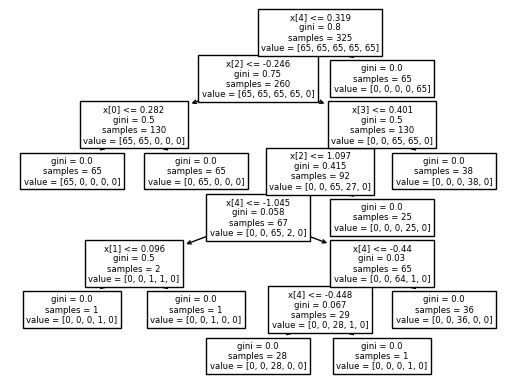

In [42]:
from sklearn.tree import plot_tree
plot_tree(model)

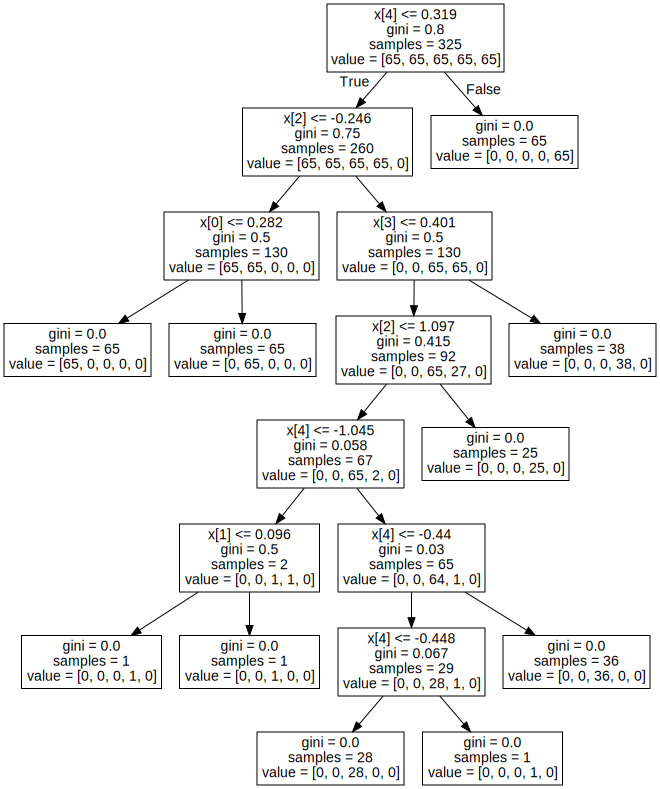

In [43]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model)
graph = graphviz.Source(dot_data)
graph

Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=42)
random.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [45]:
y_pred = random.predict(X_test)

In [46]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 5  2  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 1  3  2  2 18]]


In [47]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       drugA       0.83      0.71      0.77         7
       drugB       0.38      1.00      0.55         3
       drugC       0.75      1.00      0.86         6
       drugX       0.90      1.00      0.95        18
       drugY       1.00      0.69      0.82        26

    accuracy                           0.83        60
   macro avg       0.77      0.88      0.79        60
weighted avg       0.89      0.83      0.84        60



In [48]:
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.8333333333333334

KNN Classification

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2,p=2,metric='minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [50]:
y_pred = knn.predict(X_test)

In [51]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  1  5  0  0]
 [ 0  3  0 15  0]
 [ 1  3  2  6 14]]


In [52]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93         7
       drugB       0.30      1.00      0.46         3
       drugC       0.71      0.83      0.77         6
       drugX       0.71      0.83      0.77        18
       drugY       1.00      0.54      0.70        26

    accuracy                           0.73        60
   macro avg       0.72      0.84      0.73        60
weighted avg       0.84      0.73      0.74        60



In [53]:
accuracy = metrics.accuracy_score(y_test,y_pred)
accuracy

0.7333333333333333

Support Vector Machine

In [54]:
from sklearn.svm import SVC
svr_lin = SVC(kernel='linear',C=100,gamma='auto')
svr_lin.fit(X_train,y_train)
y_pred_lin = svr_lin.predict(X_test)

svr_rbf = SVC(kernel='rbf',C=100,gamma=0.1)
svr_rbf.fit(X_train,y_train)
y_pred_rbf = svr_rbf.predict(X_test)

svr_poly = SVC(kernel='poly',C=100,gamma='auto',degree=3,coef0=1)
svr_poly.fit(X_train,y_train)
y_pred_poly = svr_poly.predict(X_test)

svr_sig = SVC(kernel='sigmoid',C=1,gamma='auto',coef0=1)
svr_sig.fit(X_train,y_train)
y_pred_sig = svr_sig.predict(X_test)

In [55]:
cm = confusion_matrix(y_test,y_pred_lin)
print(cm)

[[ 6  1  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  2 16  0]
 [ 2  3  2  2 17]]


In [56]:
cr = classification_report(y_test,y_pred_lin)
print(cr)

              precision    recall  f1-score   support

       drugA       0.75      0.86      0.80         7
       drugB       0.43      1.00      0.60         3
       drugC       0.60      1.00      0.75         6
       drugX       0.89      0.89      0.89        18
       drugY       1.00      0.65      0.79        26

    accuracy                           0.80        60
   macro avg       0.73      0.88      0.77        60
weighted avg       0.87      0.80      0.81        60



In [57]:
accuracy = metrics.accuracy_score(y_test,y_pred_lin)
accuracy

0.8

In [58]:
cm = confusion_matrix(y_test,y_pred_rbf)
print(cm)

[[ 6  1  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  3 15  0]
 [ 2  3  1  1 19]]


In [59]:
cr = classification_report(y_test,y_pred_rbf)
print(cr)

              precision    recall  f1-score   support

       drugA       0.75      0.86      0.80         7
       drugB       0.43      1.00      0.60         3
       drugC       0.60      1.00      0.75         6
       drugX       0.94      0.83      0.88        18
       drugY       1.00      0.73      0.84        26

    accuracy                           0.82        60
   macro avg       0.74      0.88      0.78        60
weighted avg       0.88      0.82      0.83        60



In [60]:
accuracy = metrics.accuracy_score(y_test,y_pred_rbf)
accuracy

0.8166666666666667

In [61]:
cm = confusion_matrix(y_test,y_pred_poly)
print(cm)

[[ 6  1  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  1  5 12  0]
 [ 2  3  0  1 20]]


In [62]:
cr = classification_report(y_test,y_pred_poly)
print(cr)

              precision    recall  f1-score   support

       drugA       0.75      0.86      0.80         7
       drugB       0.38      1.00      0.55         3
       drugC       0.55      1.00      0.71         6
       drugX       0.92      0.67      0.77        18
       drugY       1.00      0.77      0.87        26

    accuracy                           0.78        60
   macro avg       0.72      0.86      0.74        60
weighted avg       0.87      0.78      0.80        60



In [63]:
accuracy = metrics.accuracy_score(y_test,y_pred_poly)
accuracy

0.7833333333333333

In [64]:
cm = confusion_matrix(y_test,y_pred_sig)
print(cm)

[[ 5  2  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 1  1  7  9  0]
 [ 5  3  5  1 12]]


In [65]:
cr = classification_report(y_test,y_pred_sig)
print(cr)

              precision    recall  f1-score   support

       drugA       0.45      0.71      0.56         7
       drugB       0.33      1.00      0.50         3
       drugC       0.33      1.00      0.50         6
       drugX       0.90      0.50      0.64        18
       drugY       1.00      0.46      0.63        26

    accuracy                           0.58        60
   macro avg       0.60      0.74      0.57        60
weighted avg       0.81      0.58      0.61        60



In [66]:
accuracy = metrics.accuracy_score(y_test,y_pred_sig)
accuracy

0.5833333333333334

Navie Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [68]:
y_pred = nb.predict(X_test)

In [69]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 0  0  0  0  7]
 [ 0  0  0  0  3]
 [ 0  0  0  6  0]
 [ 0  0  0 18  0]
 [ 0  0  0  2 24]]


In [70]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         7
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         6
       drugX       0.69      1.00      0.82        18
       drugY       0.71      0.92      0.80        26

    accuracy                           0.70        60
   macro avg       0.28      0.38      0.32        60
weighted avg       0.51      0.70      0.59        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
accuracy_score(y_test,y_pred)

0.7